<a href="https://colab.research.google.com/github/mpsanta/03MIAR---AlgoritmosOptimizacion---2023/blob/main/AlgoritmosOptimizacion_AG1_MagdaSanta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 de Algoritmos de Optimizacion

Nombre: MAGDA DEL PILAR SANTA FAJARDO

https://colab.research.google.com/drive/17t2-40Mi7LHIomxJK3INCTa7Wo6Mx47r?usp=sharing

https://github.com/mpsanta/03MIAR---AlgoritmosOptimizacion---2023

ALGORITMO DIVIDE Y VENCERAS

Resolver el problema principal a partir de las soluciones que proporcionan los subproblemas del mismo tipo pero de menor tamaño.

CARACTERÍSTICAS
- Problema se puede dividir en problemas más pequeños de la misma naturaleza al principal.
- Los subproblemas se pueden resolver de forma sencilla.
- Se puede combinar las soluciones de los subproblemas para componer la solución del problema principal.
- Los subproblemas no se pueden solapar.
- El proceso debe finalizar en algún momento.

NOTA: La complejidad es O(2^n).


PROBLEMA: TORRES DE HANOY

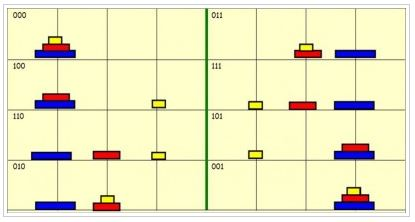
Fuente:http://www2.innovacioneducativa.upm.es/pensamientomatematico/node/76

Si tenemos n+1 discos, primero llevamos n discos a otro de los postes. Esto nos da x movimientos. Luego llevamos el disco restante (el mayor) al tercer poste, y finalmente trasladamos los n discos menores encima del mayor. 
Total: (2*x)+1 movimientos.



In [ ]:
#Torres de Hanoi - Divide y venceras

def Torres_Hanoi(N, desde, hasta):
  #N: Número de fichas
  #desde: Poste inicial
  #hasta: Poste final
  
  if N==1:
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta) #6-desde-hasta (pivote). 6 porque siempre vamos a tener 3 postes
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta)) # 1 operación
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)


PRUEBA 1: 1 ficha

In [ ]:
Torres_Hanoi(1, 1, 3)

Lleva la ficha desde 1 hasta 3


PRUEBA 2: 2 fichas

In [ ]:
Torres_Hanoi(2, 1, 3)

Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3


PRUEBA 3: 4 fichas

In [ ]:
Torres_Hanoi(4, 1, 3)

Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 3


ALGORITMOS VORACES

Elegir en cada etapa la decisión óptima. Las decisiones descartadas serán descartadas para siempre.

CARACTERÍSTICAS
- Elementos seleccionables por etapas
- Solucuión parcial.
- Función de selección del mejor candidato en cada etapa.
- Función objetivo.
- Función de factibilidad, que no me deje seguir adelante si la solución no es viable.
- Criterio que pruebe que una solución paracial ya es na solución final.


PROBLEMA: Cambio de monedas

Buscar las monedas para completar la cantidad con el sistema monetario: [25, 10, 5, 1]

La función se denomina "cambio_monedas" y se le entrega dos parámetros: Cantidad a calcular y sistema monetario


In [ ]:
#Cambio de monedas - Técnica voraz

def cambio_monedas(Cantidad,Sistema):
  #Cantidad: Valor que se requiere entregar en monedas
  #Sistema: Sistema monetario a usar, tipo de monedas

  print("El sistema a utilizar es:")
  print(Sistema)
  
  Solucion = [0 for i in range(len(Sistema))] #Inicializamos el array que contendrá la cantidad de monedas de cada valor
  #Solucion = [0]*len(Sistema)
  
  ValorAcumulado = 0 #Inicializamos el ValorAcumulado

  for indice, ValorMoneda in enumerate(Sistema): #Recorremos el sistema monetario
                                            #La función enumerate recibe un objeto iterable y retorna tuplas en 
                                            #las que cada una contiene un elemento del objeto que recibe 
                                            #y un índice que indica su posición.
    NumMonedas = (Cantidad-ValorAcumulado)//ValorMoneda #Calcula la cantidad de monedas de valor de Sistema[indice]
                                                     #Función de selección
    Solucion[indice] = NumMonedas #Añade el número de monedas a la solución
    
    ValorAcumulado = ValorAcumulado + (NumMonedas*ValorMoneda) #Incrementar el valor acumulado (Función de factibilidad)

    if Cantidad == ValorAcumulado: #Validamos si ya hemos llegado a la solución (Criterio de solución final)
      return Solucion

  print("No es posible encontrar solución")
  return Solucion


Prueba 1: Sistema monetario: [25, 10, 5, 1]

In [ ]:
Sistema = [25, 10, 5, 1]

cambio_monedas(27,Sistema)

El sistema a utilizar es:
[25, 10, 5, 1]


[1, 0, 0, 2]

Prueba 2: Sistema monetario: [25, 10, 5, 1]

In [ ]:
Sistema = [25, 10, 5, 1]

cambio_monedas(136,Sistema)

El sistema a utilizar es:
[25, 10, 5, 1]


[5, 1, 0, 1]

ALGORITMOS CON LA TÉCNICA VUELTA ATRÁS

Estudio detallado de las soluciones, entre las que trataremos de encontrar la solución óptima. 

Construcción sistemática y por etapas de todas las soluciones posibles. Se representa a través de un árbol de expansión todo el espacio de soluciones donde cada nodo es un valor diferente para cada elemento xi.

CARACTERÍSTICAS
- Las soluciones se componen de elementos que pueden ser relacionados para expresarlos en un árbol de expansión.
- Es posible encontrar un criterio para descartar determinadas ramas y evitar fuerza bruta.

PROBLEMA: Problema de las 4 reinas

Verifica que en la solución parcial no hay amenzas entre reinas




In [ ]:
#N Reinas - Vuelta Atrás


def es_prometedora(N,Solucion,Etapa): 
  '''
  Valida que no haya amenazas, 2 valores iguales en una fila o dos elementos igules en solución.
  O que no haya reinas en la misma diagonal.
  
  N = Número de reinas del tablero NxN
  Solucion = Solución parcial
  Etapa = Número de reinas colocadas en la solución parcial
  '''

  #print(Solucion) 
  
  for i in range(Etapa+1): #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
    #print("El valor " + str(Solucion[i]) + " está " +  str(Solucion.count(Solucion[i])) + " veces")
    
    if Solucion.count(Solucion[i]) > 1: #Cuenta que no haya más de un elemento igual en Solución       
      return False
  
    for j in range(i+1, Etapa+1 ): #Verifica las diagonales
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      
      if abs(i-j) == abs(Solucion[i]-Solucion[j]) : return False #Reinas en la misma columna
  
  return True




def escribe_solucion(S):
  '''
  Función que traduce la solución al tablero
  S = Solución
  '''
  
  n = len(S)
  
  for k in range(n):
    print("")
    for z in range(n):
      if S[z] == k+1:
        print(" X " , end="")
      else:
        print(" - ", end="")




def reinas(N, solucion=[],etapa=0): 
  '''
  Proceso principal de N-Reinas

  N = Número de reinas del tablero NxN
  Solucion = Solución parcial = []
  Etapa = Número de reinas colocadas en la solución parcial = 0
  '''

  if len(solucion) == 0: 
    #solucion = [0 for i in range(N)]
    for i in range(N): #Inicia la solución con una lista de ceros del tamaño de solución
      solucion.append(0)
      #print(solucion)
  
  for i in range(1, N+1): #Recorremos todas las reinas
    solucion[etapa] = i
    #print(solucion)

    if es_prometedora(N, solucion, etapa):
      
      if etapa == N-1:
        print("\n\nLa solución es:")
        print(solucion)
        escribe_solucion(solucion)
      
      else:  
        reinas(N, solucion, etapa+1)
    
    else:
      None

Prueba 1: Prueba con 4 Reinas

In [ ]:
reinas(4,solucion=[],etapa=0)



La solución es:
[3, 1, 4, 2]

 -  X  -  - 
 -  -  -  X 
 X  -  -  - 
 -  -  X  - 

Prueba 2: Prueba con 8 Reinas

In [ ]:
reinas(8,solucion=[],etapa=0)



La solución es:
[4, 7, 5, 2, 6, 1, 3, 8]

 -  -  -  -  -  X  -  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  -  X  - 
 X  -  -  -  -  -  -  - 
 -  -  X  -  -  -  -  - 
 -  -  -  -  X  -  -  - 
 -  X  -  -  -  -  -  - 
 -  -  -  -  -  -  -  X 

La solución es:
[5, 7, 2, 6, 3, 1, 4, 8]

 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - 
 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  X  - 
 X  -  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 -  X  -  -  -  -  -  - 
 -  -  -  -  -  -  -  X 

La solución es:
[6, 3, 5, 7, 1, 4, 2, 8]

 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  X  - 
 -  X  -  -  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - 
 X  -  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  -  -  X 

La solución es:
[6, 4, 7, 1, 3, 5, 2, 8]

 -  -  -  X  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  -  X  -  -  - 
 -  X  -  -  -  -  -  - 
 -  -  -  -  -  X  -  - 
 X  -  -  -  -  -  -  - 
 -  -  X  -  -  -  -  - 
 -  -  -  -  -  -  -  X 